In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

In [13]:
def get_test_loss(l2):
    data_names = ['Gauss', "Gauss_tight", "ALS_CG", "ALS_CG_tight", "ALS"]
    data_frames = []
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20.csv') )   # Gauss
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.01_cgt_200.csv') ) # Gauss tight
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20.csv') )   # ALSCG 
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.01_cgt_200.csv') ) # ALSCG tight
    data_frames.append( pd.read_csv('matlab-log/'+'sol_2_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20.csv') )   # ALS
    for i in range(len(data_frames)): 
        data_frames[i] = data_frames[i][["iter", "test_loss"]]
        data_frames[i] = data_frames[i].rename(columns = {'test_loss': data_names[i]})
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)

def get_obj(l2):
    data_names = ['Gauss', "Gauss_tight", "ALS_CG", "ALS_CG_tight", "ALS"]
    data_frames = []
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20.csv') )   # Gauss
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.01_cgt_200.csv') ) # Gauss tight
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20.csv') )   # ALSCG 
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.01_cgt_200.csv') ) # ALSCG tight
    data_frames.append( pd.read_csv('matlab-log/'+'sol_2_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20.csv') )   # ALS
    for i in range(len(data_frames)): 
        data_frames[i] = data_frames[i][["iter", "obj"]]
        data_frames[i] = data_frames[i].rename(columns = {'obj': data_names[i]})
    return reduce(lambda left,right: pd.merge(left,right,on=['iter'], how='outer'), data_frames)

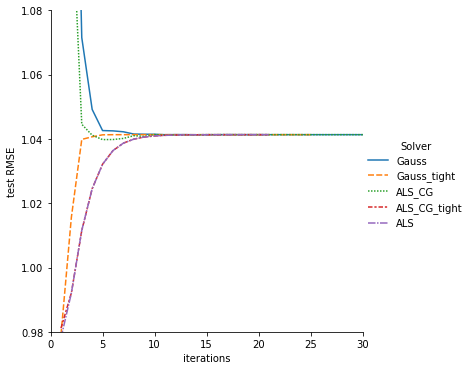

In [14]:
data = get_test_loss('5e-1')
data = data.melt(id_vars="iter", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="iter", y="RMSE", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(0.98,1.08), xlim=(0,30), xlabel="iterations", ylabel="test RMSE")
g.savefig("fig/fig1-5e-1-RMSE.png")

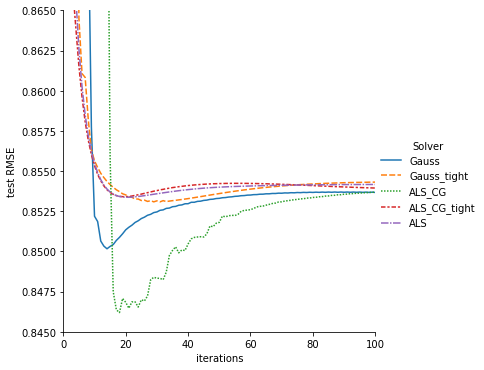

In [15]:
data = get_test_loss('5e-2')
data = data.melt(id_vars="iter", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="iter", y="RMSE", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(0.845,0.865), xlim=(0,100), xlabel="iterations", ylabel="test RMSE")
g.savefig("fig/fig1-5e-2-RMSE.png")

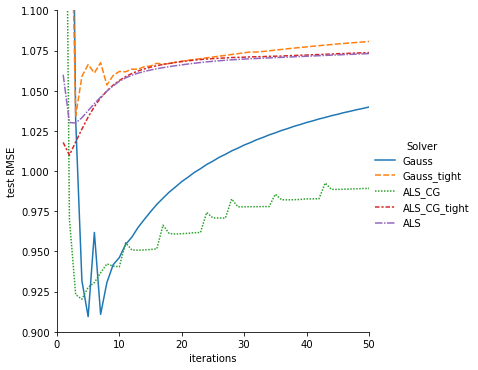

In [16]:
data = get_test_loss('5e-3')
data = data.melt(id_vars="iter", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="iter", y="RMSE", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(0.9,1.1), xlim=(0,50), xlabel="iterations", ylabel="test RMSE")
g.savefig("fig/fig1-5e-3-RMSE.png")

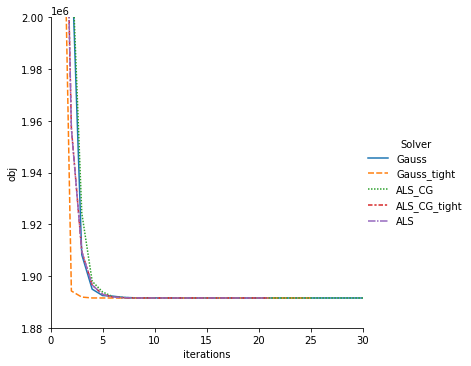

In [17]:
data = get_obj('5e-1')
data = data.melt(id_vars="iter", var_name="Solver", value_name="obj")
g = sns.relplot(x="iter", y="obj", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(1.88e6, 2e6), xlim=(0,30), xlabel="iterations", ylabel="obj")
g.savefig("fig/fig1-5e-1-obj.png")

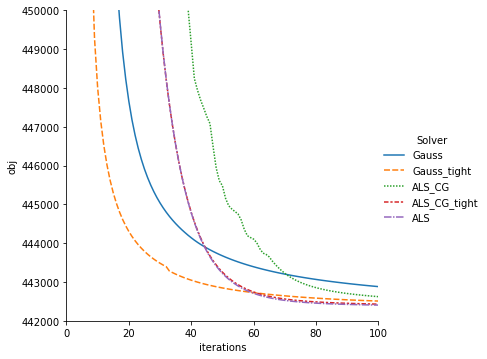

In [18]:
data = get_obj('5e-2')
data = data.melt(id_vars="iter", var_name="Solver", value_name="obj")
g = sns.relplot(x="iter", y="obj", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(4.42e5, 4.5e5), xlim=(0,100), xlabel="iterations", ylabel="obj")
g.savefig("fig/fig1-5e-2-obj.png")

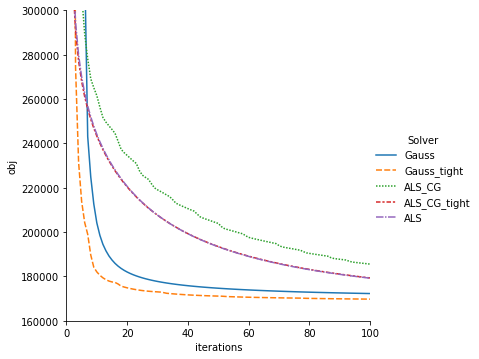

In [19]:
data = get_obj('5e-3')
data = data.melt(id_vars="iter", var_name="Solver", value_name="obj")
dash_list = sns._core.unique_dashes(data["Solver"].unique().size+1)
style = {key:value for key,value in zip(data["Solver"].unique(), dash_list[1:])}
g = sns.relplot(x="iter", y="obj", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(1.6e5, 3e5), xlim=(0,100), xlabel="iterations", ylabel="obj")
g.savefig("fig/fig1-5e-3-obj.png")